In [1]:
import numpy as np
import pandas as pd 
import folium

# Get locations data
locations = pd.read_csv("WarehouseLocations.csv")

# Obtain coordinates of each location
coords = locations[['Long', 'Lat']] # Mapping packages work with Long, Lat arrays  
coords = coords.to_numpy().tolist() # Make the arrays into a list of lists

# Folium requires Lat then Long arrays, so reverse the order
m = folium.Map(location = list(reversed(coords[2])), zoom_start = 10)

# folium.Marker(list(reversed(coords[0])), popup = locations.Store[0], icon = folium.Icon(color = 'black')).add_to(m)

# Set location markers depending on its type (either The Warehouse/Noel Leeming/Distribution Centre)
for i in range(0, len(coords)):
    # The Warehouse stores will be shown in red 
    if locations.Type[i] == "The Warehouse":
        iconCol = "red"
    # Noel Leeming stores will be shown in orange
    elif locations.Type[i] == "Noel Leeming":
        iconCol = "orange"
    # Distribution centres will be shown in black
    elif locations.Type[i] == "Distribution":
        iconCol = "black"
    # Add markers to the map
    folium.Marker(list(reversed(coords[i])), popup = locations.Store[i], icon = folium.Icon(color = iconCol)).add_to(m)
# m

In [2]:
import openrouteservice as ors
from main import*
from random_color import rand_color

# Boot up client to OpenRouteService
ORSkey = '5b3ce3597851110001cf624862488e5d98474379ab630ebc96a0ef29'
# The client ORSkey
client = ors.Client(key=ORSkey)

# Get relevant demand, location and duration data
demandData = load_DemandData()
locations = load_WarehouseLocations()
durations = load_WarehouseRoutes(False)

# number of iterations
n = 1000

# Initialise nodes
nodes = initialise_nodes(demandData,locations)
# Create routes
north_routes, north_obj = find_routes(nodes,durations,n,False)

# Transform set of routes into list
north_route_list = list(north_routes)

# Initialise coordinates list
north_coord = []

# Set coordinates of routes to visualise routes on the map
for i in range(len(north_route_list)):
    for j in range(len(north_routes[north_route_list[i]].nodes)):
        north_coord.append(north_routes[north_route_list[i]].nodes[j].location)    
    route = client.directions(coordinates = north_coord, profile = 'driving-hgv', format = 'geojson', validate = False)
    # Also insert random HTML hex color code generated so each route has different colors 
    folium.PolyLine(locations = [list(reversed(north_coord)) for north_coord in route['features'][0]['geometry']['coordinates']], \
                    color = rand_color(), weight = 3).add_to(m)
    north_coord = []
m.save("north_open_routes.html")

<Figure size 640x480 with 4 Axes>

<Figure size 640x480 with 4 Axes>

In [4]:
# Get locations data
locations = pd.read_csv("WarehouseLocations.csv")

# Obtain coordinates of each location
coords = locations[['Long', 'Lat']] # Mapping packages work with Long, Lat arrays  
coords = coords.to_numpy().tolist() # Make the arrays into a list of lists

# Folium requires Lat then Long arrays, so reverse the order
m = folium.Map(location = list(reversed(coords[2])), zoom_start = 10)

# folium.Marker(list(reversed(coords[0])), popup = locations.Store[0], icon = folium.Icon(color = 'black')).add_to(m)

# Set location markers depending on its type (either The Warehouse/Noel Leeming/Distribution Centre)
for i in range(0, len(coords)):
    # The Warehouse stores will be shown in red 
    if locations.Type[i] == "The Warehouse":
        iconCol = "red"
    # Noel Leeming stores will be shown in orange
    elif locations.Type[i] == "Noel Leeming":
        iconCol = "orange"
    # Distribution centres will be shown in black
    elif locations.Type[i] == "Distribution":
        iconCol = "black"
    # Add markers to the map
    folium.Marker(list(reversed(coords[i])), popup = locations.Store[i], icon = folium.Icon(color = iconCol)).add_to(m)
# m

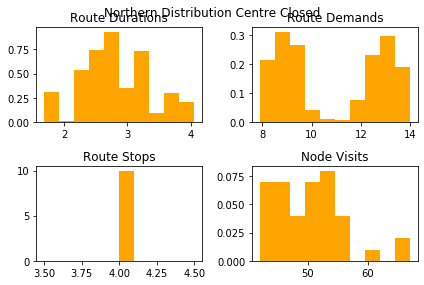

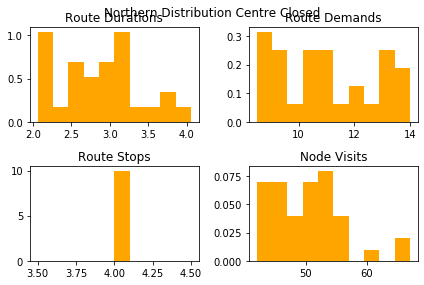

In [6]:
# Boot up client to OpenRouteService
ORSkey = '5b3ce3597851110001cf624862488e5d98474379ab630ebc96a0ef29'
# The client ORSkey
client = ors.Client(key=ORSkey)

# Get relevant demand, location and duration data
demandData = load_DemandData()
locations = load_WarehouseLocations()
durations = load_WarehouseRoutes(False)

# number of iterations
n = 1000

# Initialise nodes
nodes = initialise_nodes(demandData,locations)

south_routes, south_obj = find_routes(nodes,durations,n,True)

# Transform set of routes when northern distribution centre is closed into list (call this a scenario 2)
south_route_list = list(south_routes)

# Initialise scenario 2 coordinates list
south_coord = []

# Set coordinates of scenario 2 routes to visualise routes on the map
for i in range(len(south_route_list)):
    for j in range(len(south_routes[south_route_list[i]].nodes)):
        south_coord.append(south_routes[south_route_list[i]].nodes[j].location)    
    route = client.directions(coordinates = south_coord, profile = 'driving-hgv', format = 'geojson', validate = False)
    # Also insert random HTML hex color code generated so each route has different colors 
    folium.PolyLine(locations = [list(reversed(south_coord)) for south_coord in route['features'][0]['geometry']['coordinates']], \
                    color = rand_color(), weight = 3).add_to(m)
    south_coord = []
m.save("north_closed_routes.html")